In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the tech stock tickers and their names
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set start and end dates for the data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Initialize an empty list to store dataframes
company_list = []

# Fetch data for each stock and add company name
for stock, name in zip(tech_list, company_name):
    data = yf.download(stock, start=start, end=end)
    data["Company"] = name  # Add a column for the company name
    data["Ticker"] = stock  # Add a column for the ticker symbol
    company_list.append(data)

# Concatenate all the company data into a single dataframe
df = pd.concat(company_list)

# Reset index for better handling
df.reset_index(inplace=True)

# Display the last 10 rows of the dataframe
print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price        Date Close High  Low Open Volume Company Ticker Close High  ...  \
Ticker             AAPL AAPL AAPL AAPL   AAPL                 GOOG GOOG  ...   
994    2025-01-03   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
995    2025-01-06   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
996    2025-01-07   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
997    2025-01-08   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
998    2025-01-10   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
999    2025-01-13   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
1000   2025-01-14   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
1001   2025-01-15   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
1002   2025-01-16   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   
1003   2025-01-17   NaN  NaN  NaN  NaN    NaN  AMAZON   AMZN   NaN  NaN  ...   

Price  Close High  Low Open Volume     

In [ ]:
# Fill missing values with forward fill or backward fill
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill


<ipython-input-17-4f0ca45ca344>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-17-4f0ca45ca344>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,209.236268,211.028308,207.244936,209.079273,5.673996e+07
std,26.010299,26.108750,25.635920,25.901406,3.088896e+07
min,164.405121,165.800067,163.488440,164.753849,2.323470e+07
25%,184.658409,186.256828,182.886129,185.061146,4.123235e+07
50%,218.047424,220.352245,215.632887,218.436559,4.970140e+07
75%,228.269997,229.925303,226.269591,228.426350,6.256435e+07
max,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-19 to 2025-01-17
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


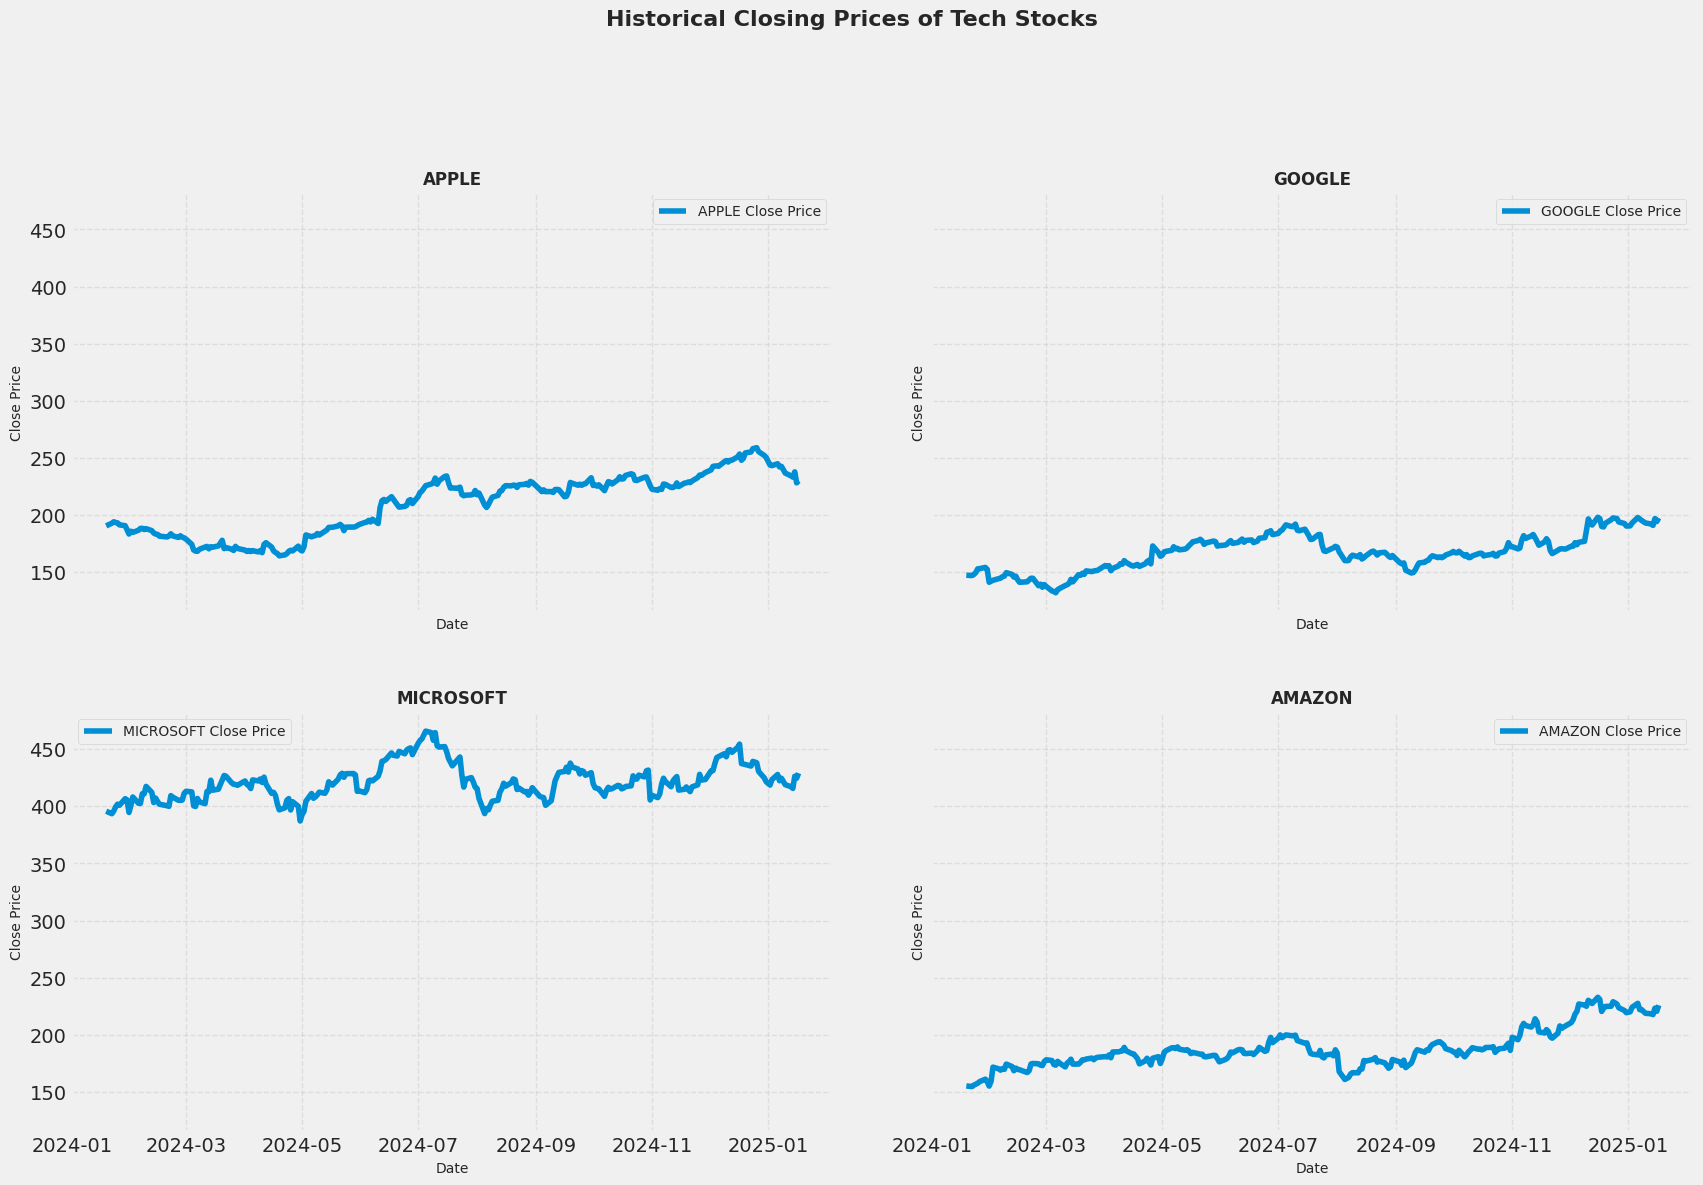

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot size and layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle('Historical Closing Prices of Tech Stocks', fontsize=16, weight='bold', y=1.02)

# Iterate through company data for plotting
for ax, company, name in zip(axes.flatten(), company_list, company_name):
    ax.plot(company.index, company['Close'], label=f"{name} Close Price")
    ax.set_title(f"{name}", fontsize=12, weight='bold')
    ax.set_ylabel('Close Price', fontsize=10)
    ax.set_xlabel('Date', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=10)

# Adjust layout
fig.tight_layout(pad=3.0)

# Show the plots
plt.show()


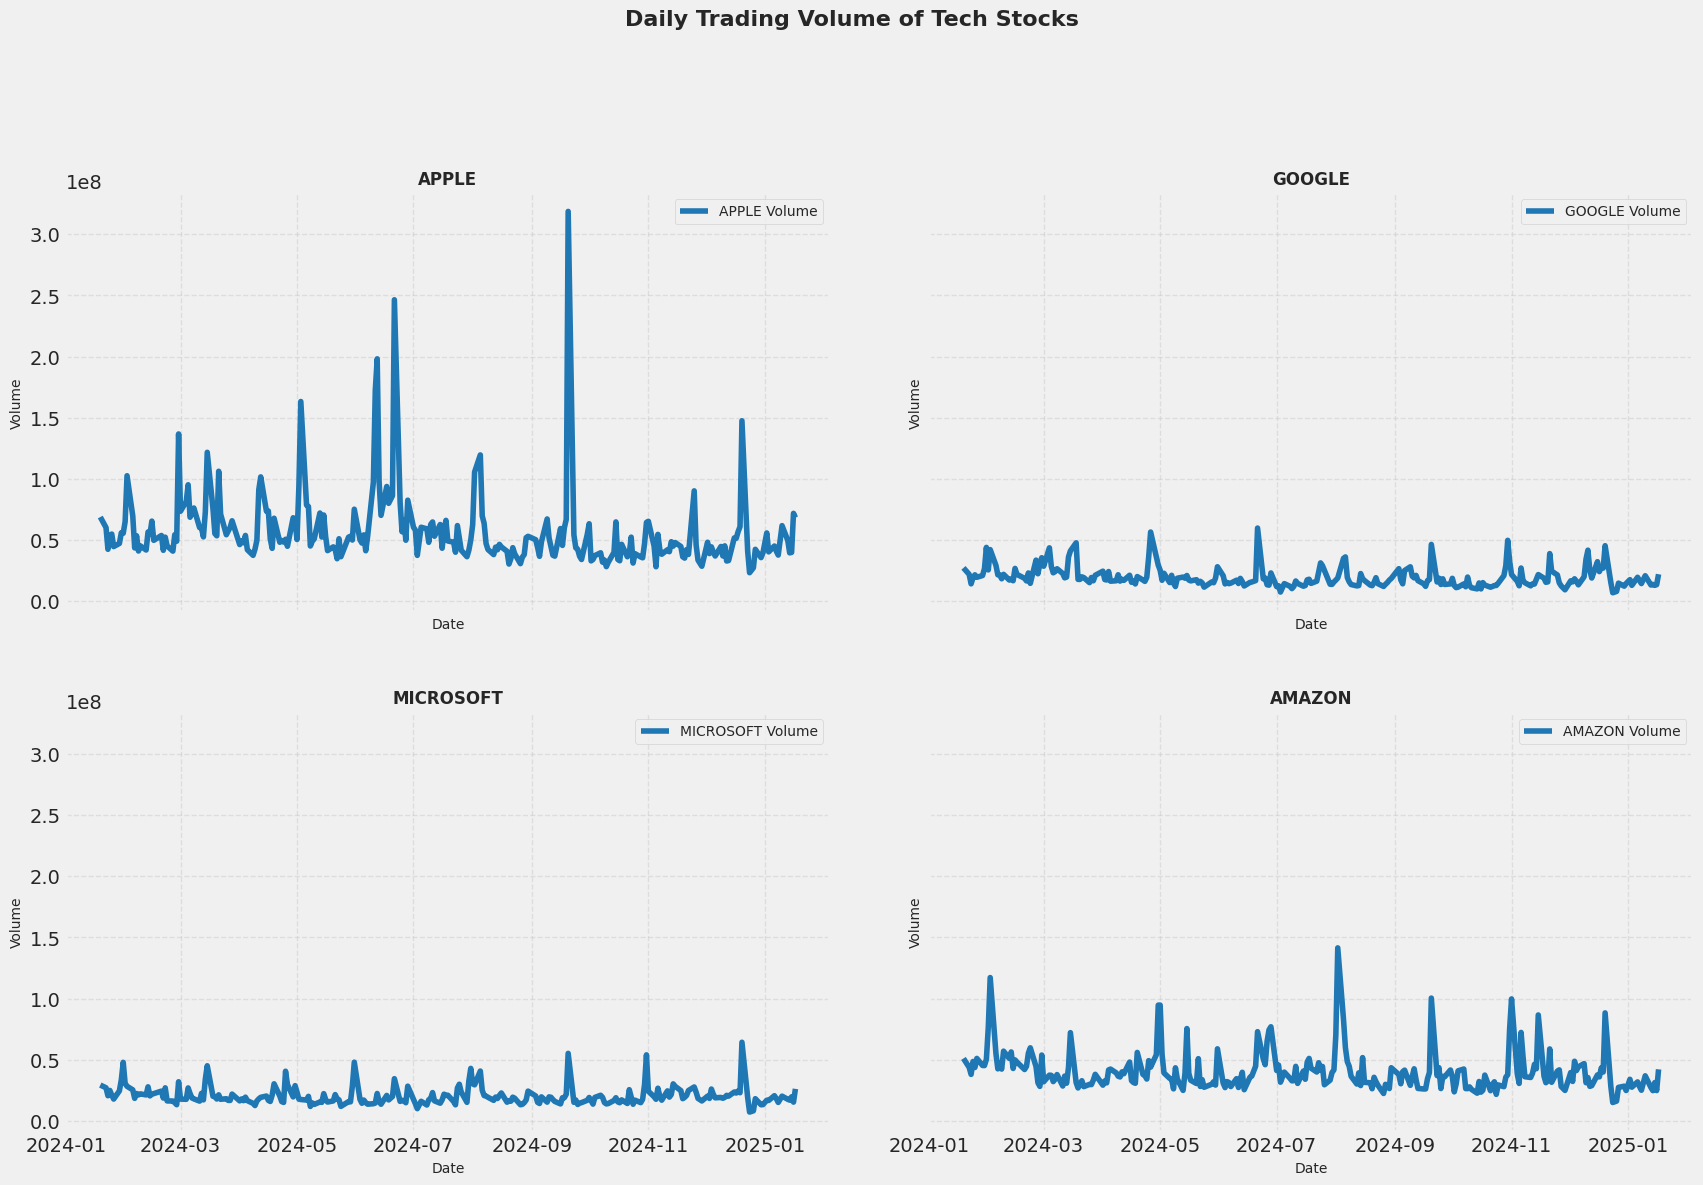

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot size and layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle('Daily Trading Volume of Tech Stocks', fontsize=16, weight='bold', y=1.02)

# Iterate through company data for plotting
for ax, company, name in zip(axes.flatten(), company_list, company_name):
    ax.plot(company.index, company['Volume'], label=f"{name} Volume", color='tab:blue')
    ax.set_title(f"{name}", fontsize=12, weight='bold')
    ax.set_ylabel('Volume', fontsize=10)
    ax.set_xlabel('Date', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=10)

# Adjust layout
fig.tight_layout(pad=3.0)

# Show the plots
plt.show()


# 2. What was the moving average of the various stocks?¶
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

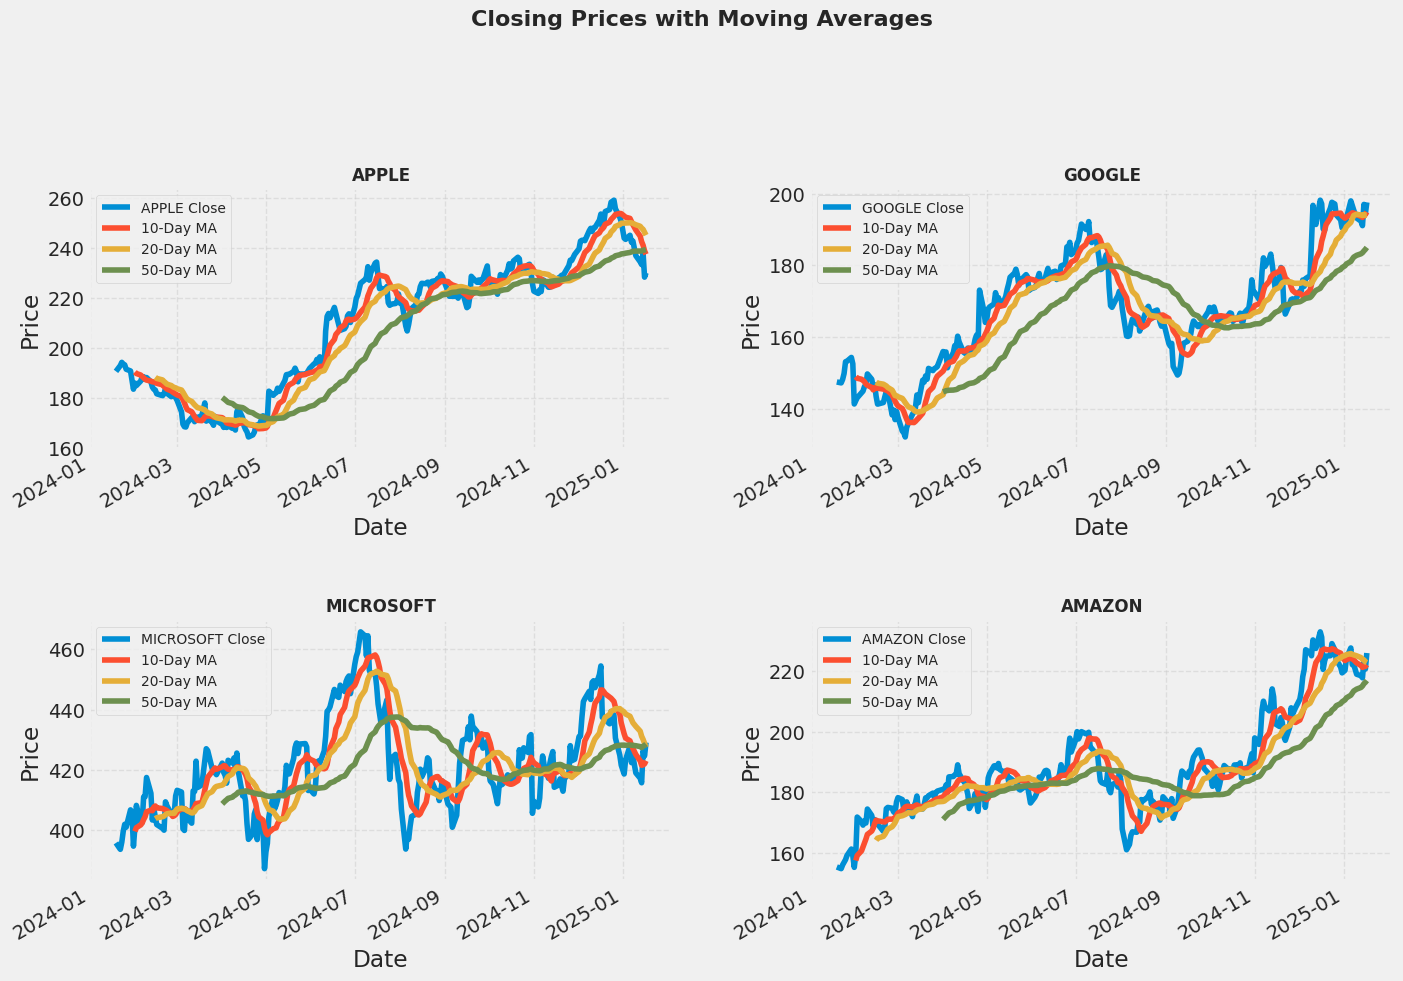

In [ ]:
# Define the moving averages
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for company, name in zip(company_list, company_name):
    for ma in ma_day:
        column_name = f"MA {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

# Set up the plot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Closing Prices with Moving Averages', fontsize=16, weight='bold', y=1.02)

# Plot each company's data
for ax, company, name in zip(axes.flatten(), company_list, company_name):
    company[['Close', 'MA 10 days', 'MA 20 days', 'MA 50 days']].plot(ax=ax)
    ax.set_title(name, fontsize=12, weight='bold')
    ax.set_ylabel('Price')
    ax.set_xlabel('Date')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend([f"{name} Close", "10-Day MA", "20-Day MA", "50-Day MA"], fontsize=10)

# Adjust layout for better readability
fig.tight_layout(pad=3.0)

# Show the plots
plt.show()


# 4. What was the correlation between different stocks closing prices?¶
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock tickers
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define the start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch the adjusted closing prices for all stocks in tech_list
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns
print(tech_rets.head())


[*********************100%***********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2024-01-19       NaN       NaN       NaN       NaN
2024-01-22  0.012163 -0.003605 -0.001757 -0.005418
2024-01-23  0.006653  0.008011  0.006567  0.006027
2024-01-24 -0.003484  0.005448  0.011232  0.009175
2024-01-25 -0.001697  0.005610  0.021882  0.005738


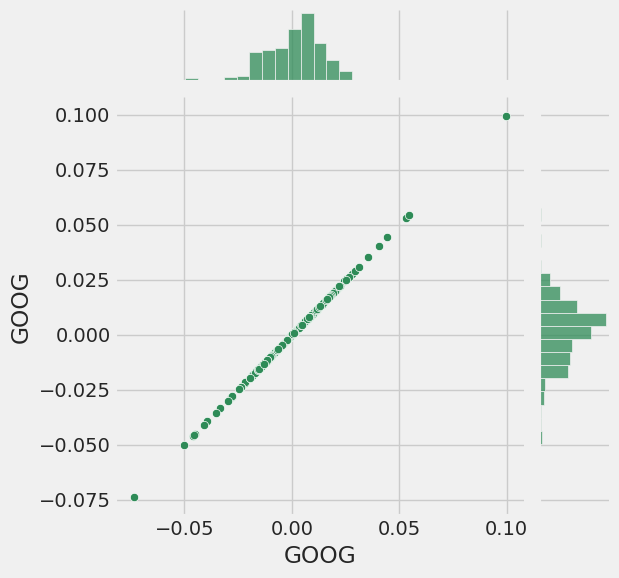

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

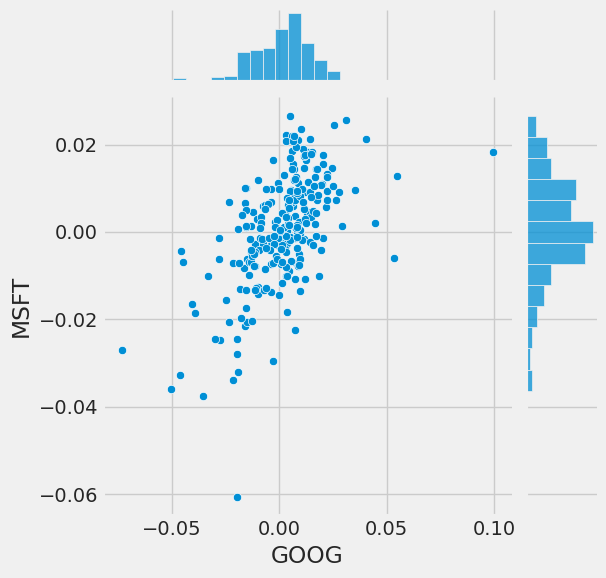

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

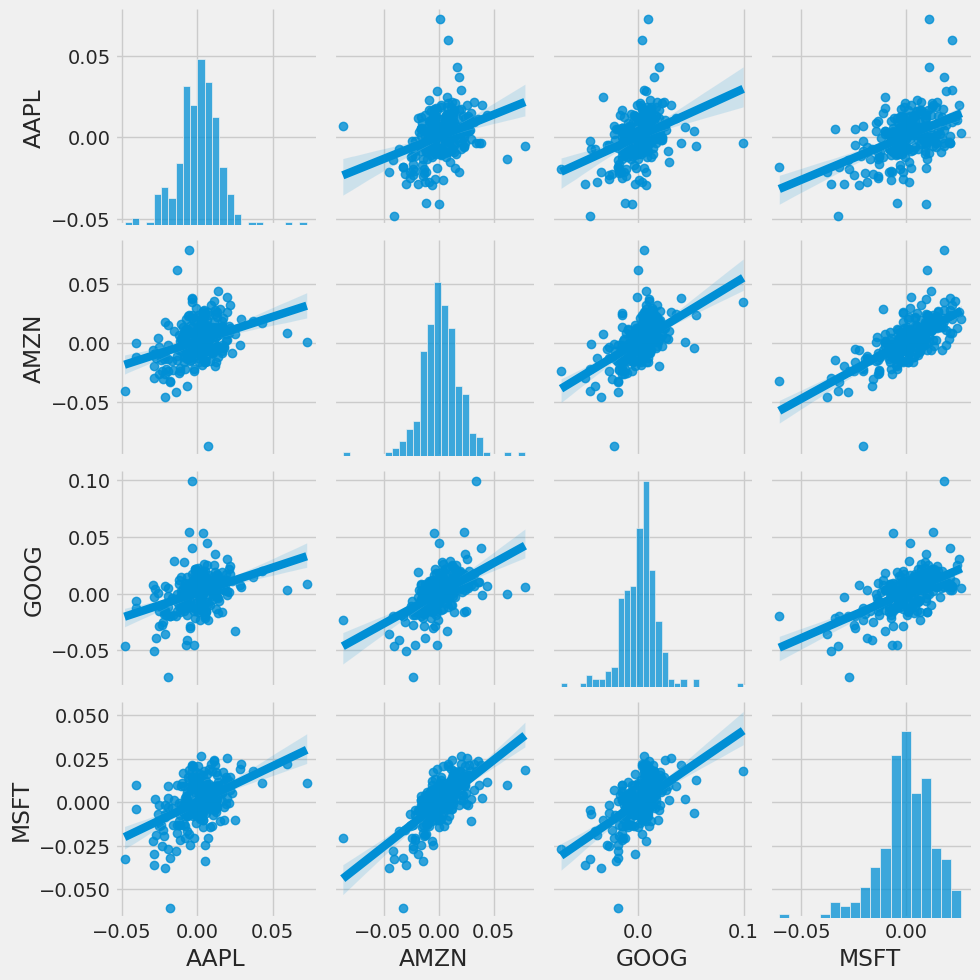

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

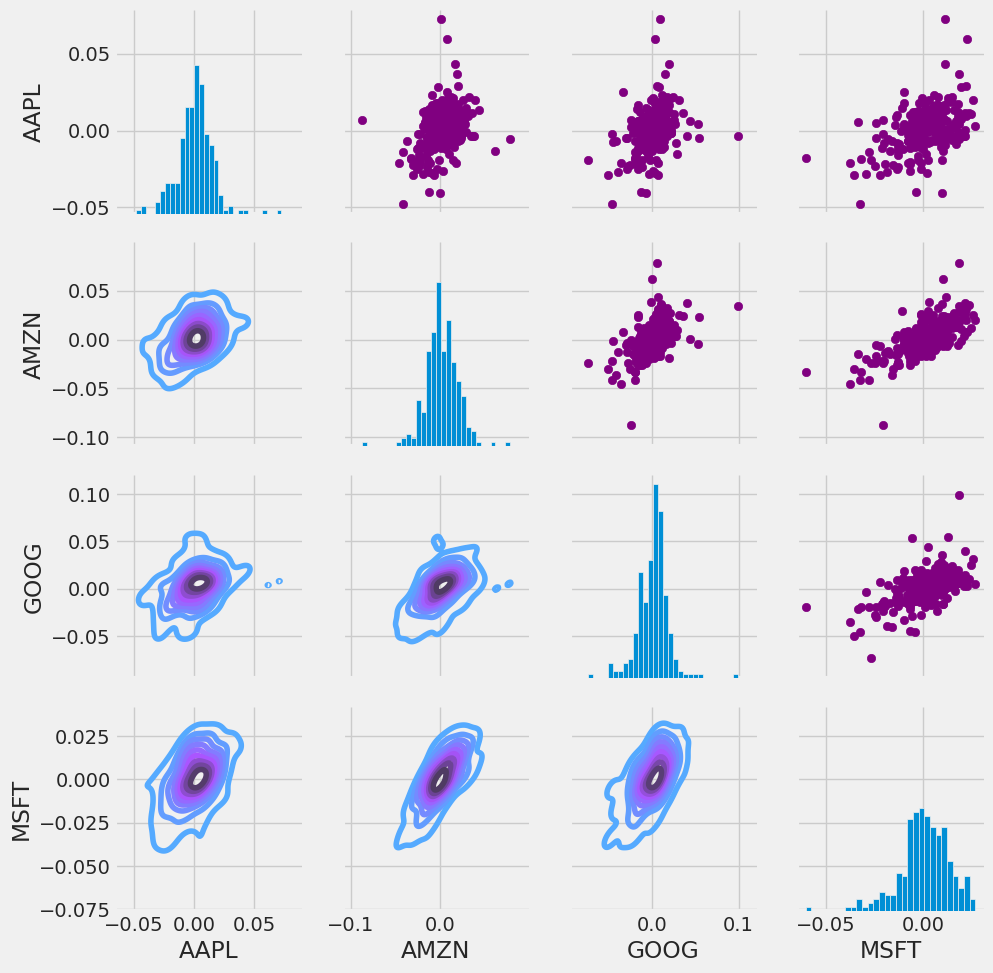

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

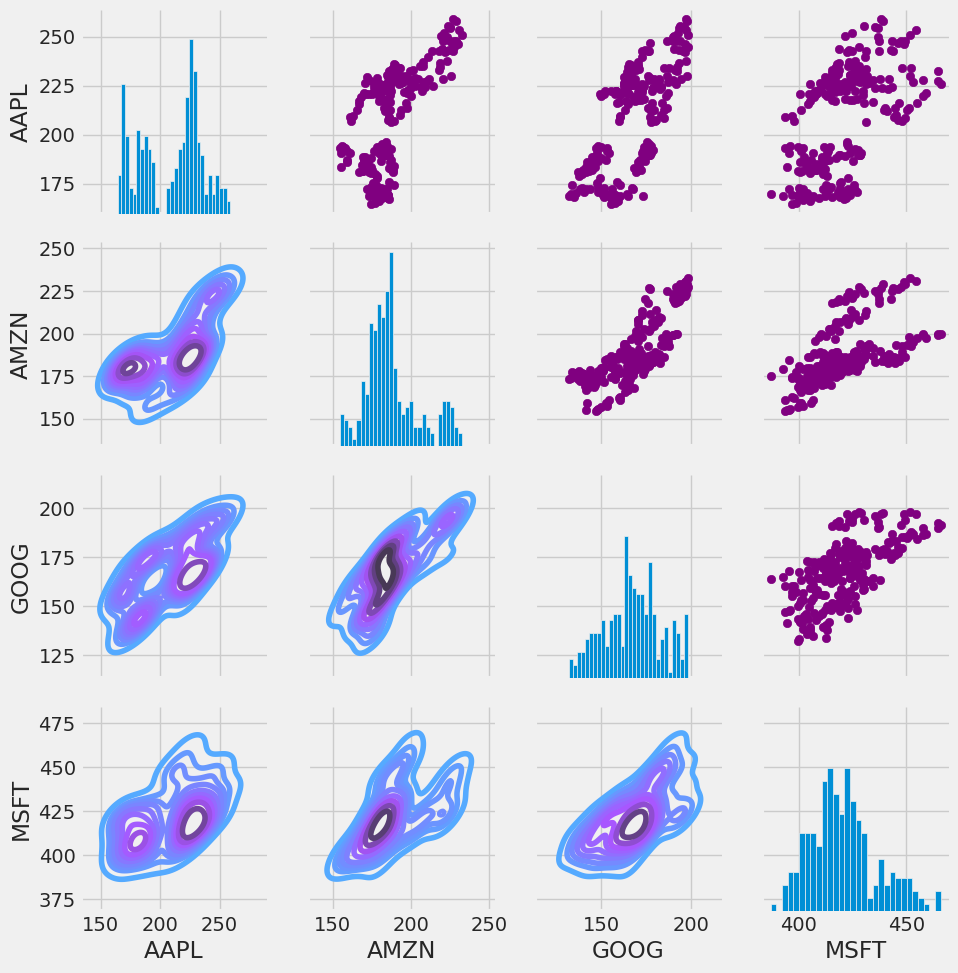

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

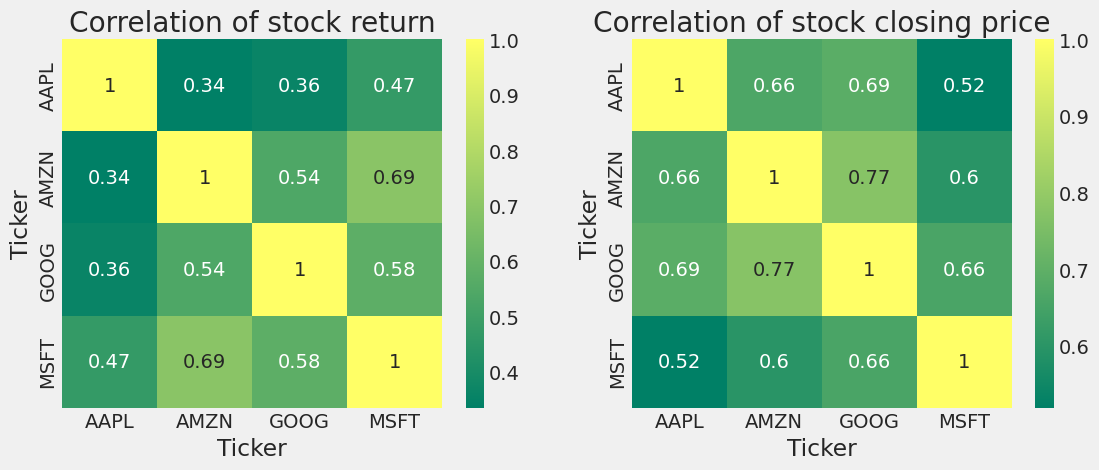

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

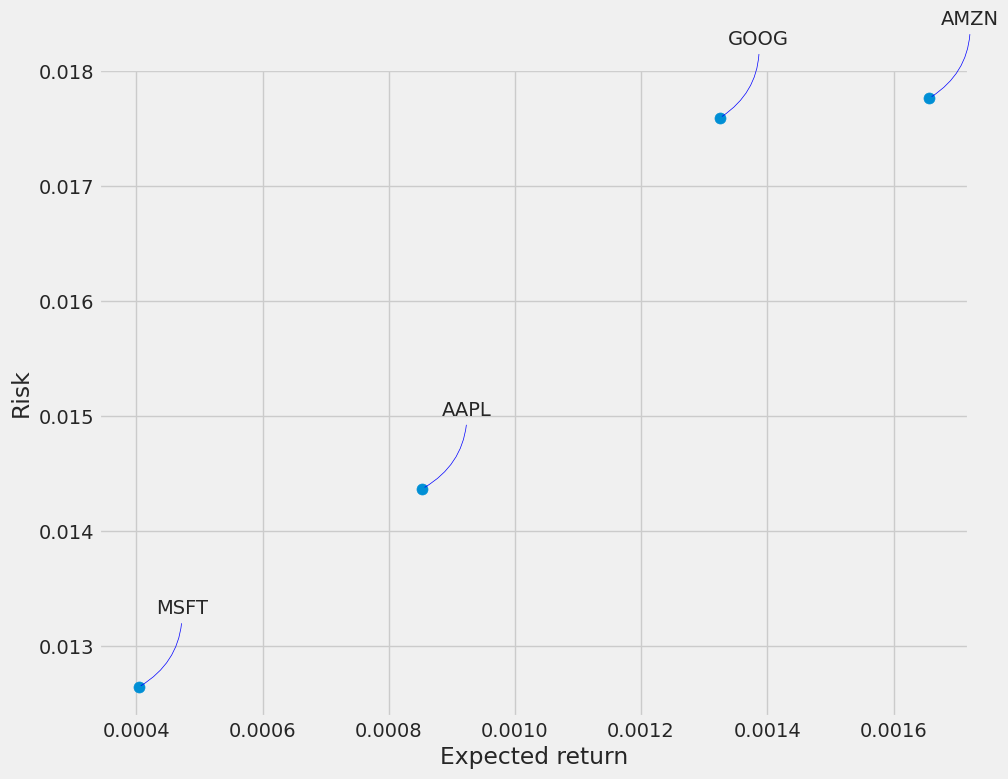

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# # 6. Predicting the closing price stock price of APPLE inc:

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Fetch stock data for AAPL using yfinance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2012-01-03   12.388997   12.427258   12.321815   12.333866  302220800
2012-01-04   12.455577   12.492935   12.330250   12.351941  260022000
2012-01-05   12.593860   12.609525   12.432380   12.501070  271269600
2012-01-06   12.725513   12.736057   12.629710   12.646280  318292800
2012-01-09   12.705328   12.886691   12.693880   12.818906  394024400
...                ...         ...         ...         ...        ...
2025-01-13  234.399994  234.669998  229.720001  233.529999   49630700
2025-01-14  233.279999  236.119995  232.470001  234.750000   39435300
2025-01-15  237.869995  238.960007  234.429993  234.639999   39832000
2025-01-16  228.259995  238.009995  228.029999  237.350006   71759100
2025-01-17  229.979996  232.289993  228.479996  232.119995   68247100

[3281 rows x 5 colu

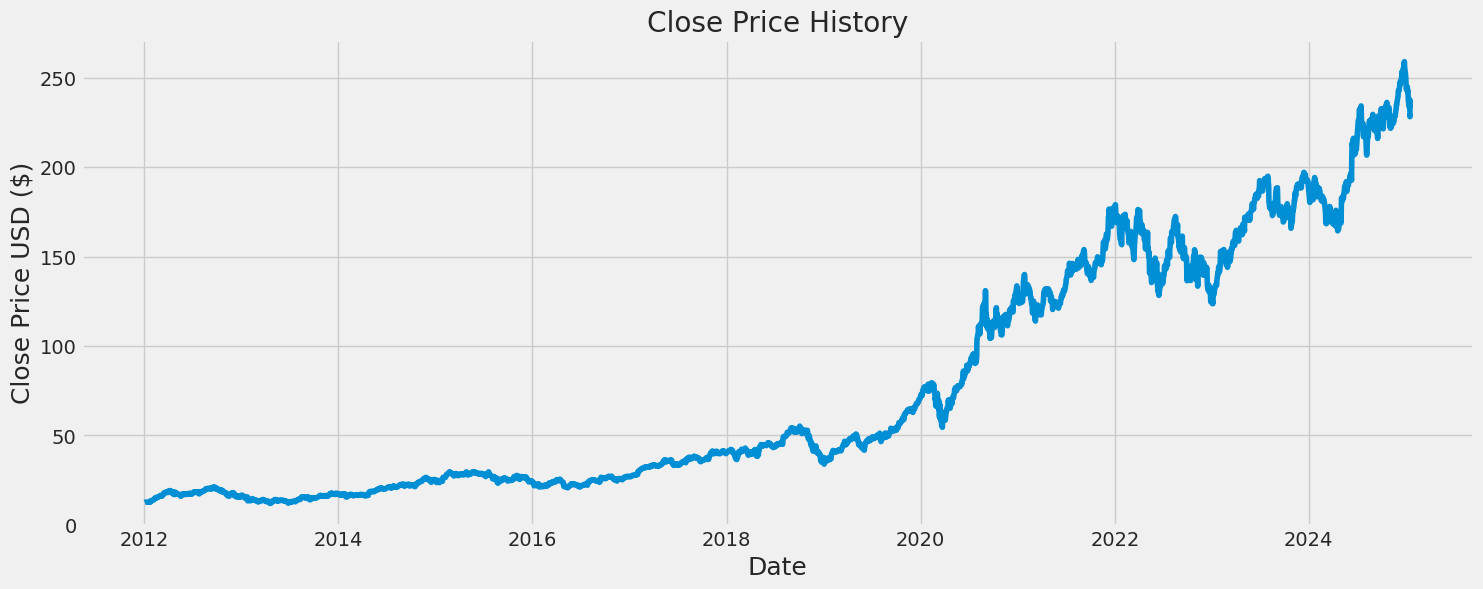

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3117

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Example: If using a specific column (e.g., Close prices) for scaling
# Replace 'Close' with the relevant column in your dataset
dataset = df[['Close']].values  # Convert to numpy array if not already

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)


[[0.00182111]
 [0.00209057]
 [0.00265024]
 ...
 [0.91440055]
 [0.87550641]
 [0.8824677 ]]


In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182111, 0.00209057, 0.00265024, 0.00318307, 0.00310138,
       0.00328549, 0.00320135, 0.00305993, 0.00286728, 0.00346351,
       0.00400121, 0.00383539, 0.00292702, 0.00379393, 0.00294041,
       0.00614109, 0.00589359, 0.00621669, 0.00691537, 0.00733845,
       0.00730309, 0.00717263, 0.00772864, 0.0082517 , 0.0088443 ,
       0.00980144, 0.01181211, 0.01184257, 0.01296188, 0.01379833,
       0.0123608 , 0.01291435, 0.01290335, 0.01445554, 0.01423483,
       0.01464332, 0.01537736, 0.0157858 , 0.01696243, 0.0178196 ,
       0.01806713, 0.01815367, 0.01668811, 0.01633447, 0.01638692,
       0.01776472, 0.01815245, 0.01898527, 0.02094833, 0.02356739,
       0.02307721, 0.02307844, 0.02497204, 0.0255646 , 0.02514273,
       0.02475745, 0.02435628, 0.02568898, 0.02660346, 0.02698631])]
[0.02604012965613199]

[array([0.00182111, 0.00209057, 0.00265024, 0.00318307, 0.00310138,
       0.00328549, 0.00320135, 0.00305993, 0.00286728, 0.00346351,
       0.00400121, 0.00383539, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3057/3057 ━━━━━━━━━━━━━━━━━━━━ 173s 55ms/step - loss: 0.0021


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


5.44348819447757

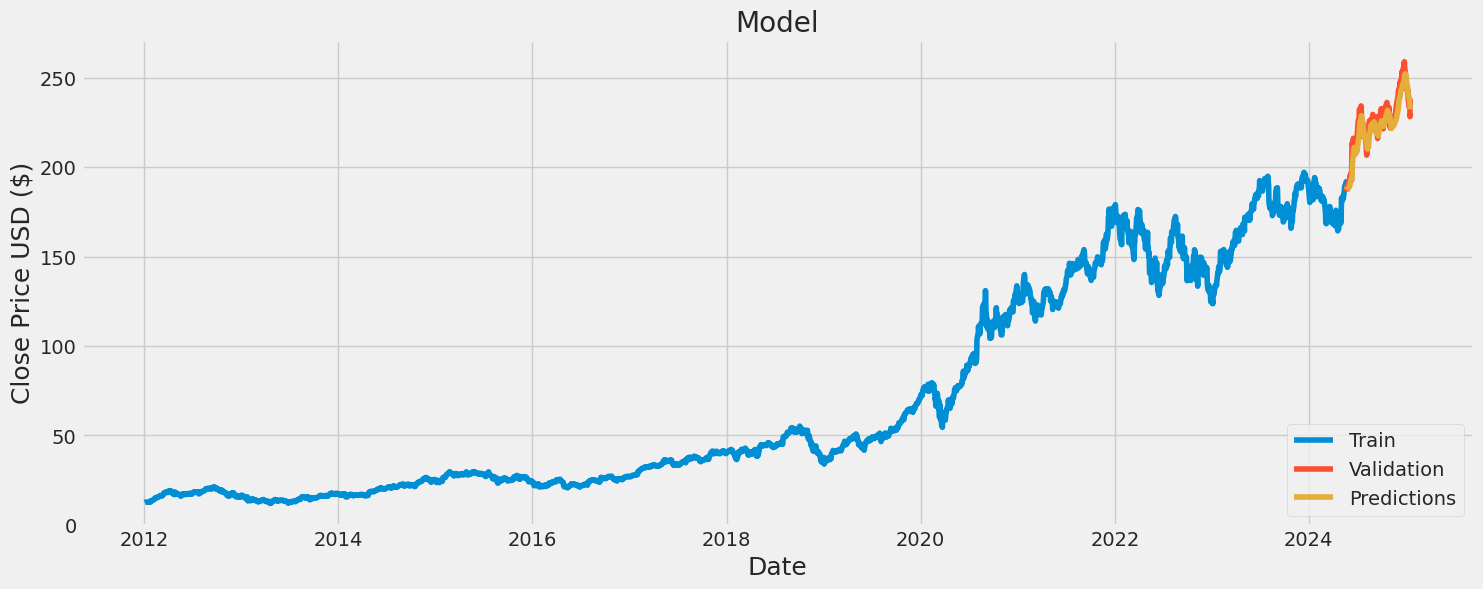

In [ ]:
# Ensure 'data' contains the 'Close' column
data = df[['Close']]  # If your data is not already in this format

# Split the data into training and validation sets
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Add predictions to the validation set
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot training and validation data
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Validation', 'Predictions'])

# Add legend
plt.legend(loc='lower right')
plt.show()


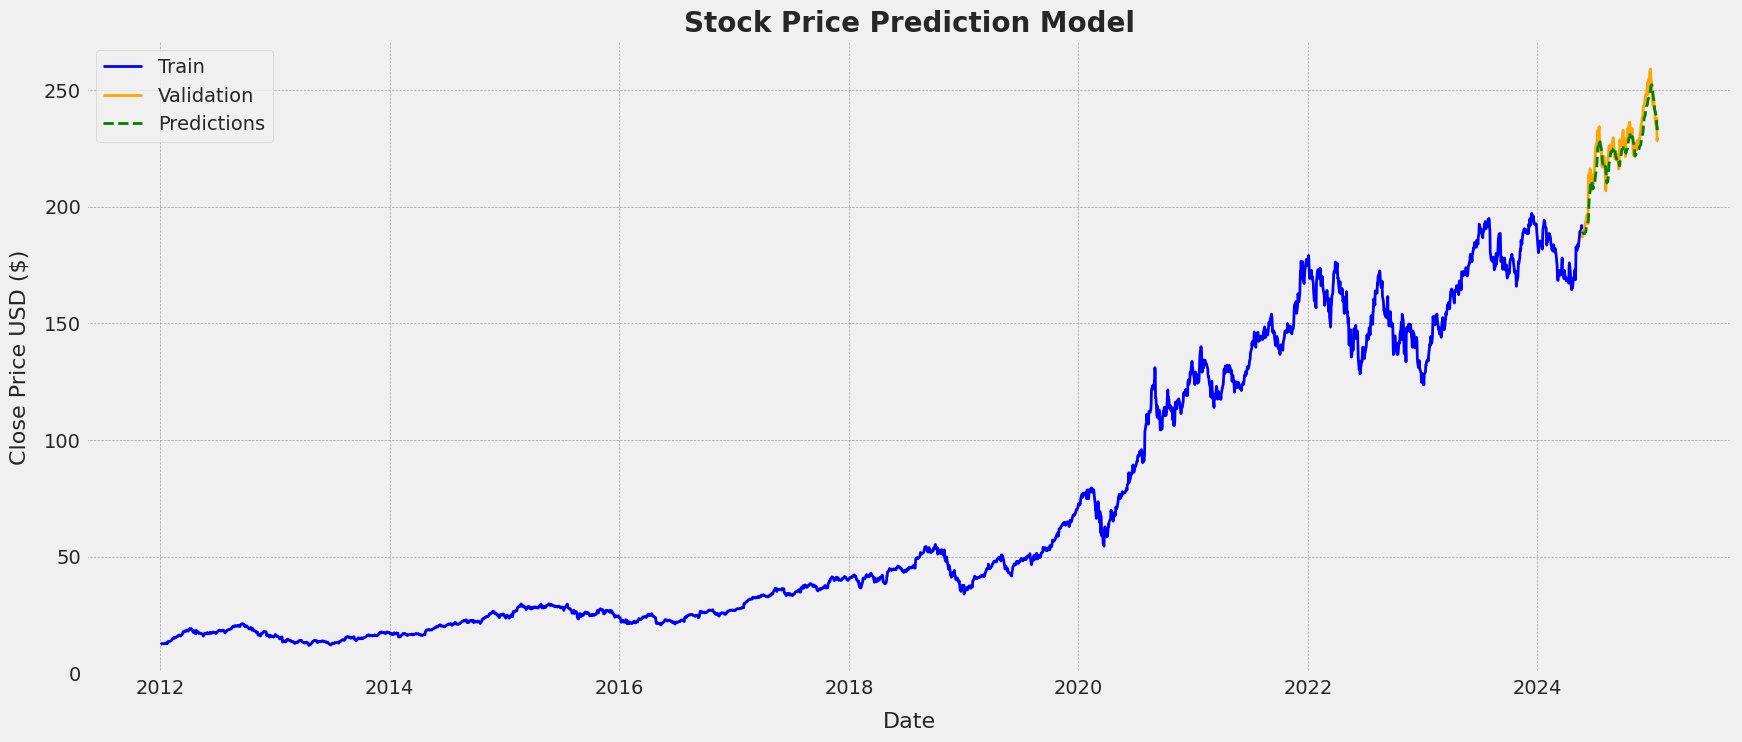

In [ ]:
# Ensure 'data' contains the 'Close' column
data = df[['Close']]  # Extract 'Close' prices if not already done

# Split the data into training and validation sets
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Add predictions to the validation set
valid['Predictions'] = predictions

# Set the figure resolution and size
plt.figure(figsize=(18, 8), dpi=100)
plt.title('Stock Price Prediction Model', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=16, labelpad=10)
plt.ylabel('Close Price USD ($)', fontsize=16, labelpad=10)

# Plot training data
plt.plot(train['Close'], label='Train', linewidth=2, color='blue')

# Plot validation data and predictions
plt.plot(valid['Close'], label='Validation', linewidth=2, color='orange')
plt.plot(valid['Predictions'], label='Predictions', linewidth=2, color='green', linestyle='dashed')

# Add grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=14, loc='upper left', frameon=True)

# Optimize layout and show plot
plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-05-23,186.458801,189.313004
2024-05-24,189.551804,188.762146
2024-05-28,189.561798,188.497879
2024-05-29,189.861115,188.382629
2024-05-30,190.858856,188.422424
...,...,...
2025-01-13,234.399994,239.037720
2025-01-14,233.279999,236.928986
